資料集網址:<br>
SECOND HAND CARS DATA SET | REGRESSION<br>
https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression

# 資料集讀取

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/train.csv')

# Display the data before removing rows with missing values
print('Data before removing rows with missing vlaues:')
print(df.head())

Data before removing rows with missing vlaues:
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  


# 處理空值

In [ ]:
from re import I
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/train.csv')

# Display the data before removing rows with missing values
print('Data before removing rows with missing vlaues:')
print(df.head())

# Check and remove rows with missing values
df.dropna(inplace=False)

# Display the data after removing rows with missing values
print('\nData after removing rows with missing values:')
print(df.head())

Data before removing rows with missing vlaues:
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  

Data after removing rows with missing values:
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2      

# **補缺失值**

In [ ]:
import pandas as pd
import numpy as np

# 讀取 CSV 檔案
df = pd.read_csv('/content/drive/MyDrive/train.csv')

# 顯示不值前的資料
print('補值前的資料:')
print(df.head())

# 定義將缺失值補中位數的函式
def replace_missing_median(data):
    # 計算中位數
    median = np.nanmedian(data)
    # 將缺失值用中位數進行補值
    data.fillna(median, inplace=True)
    return data
# 對數值型資料欄位應用 replace_missing_median 函式
numerical_columns = df.select_dtypes(include=np.number).columns
df[numerical_columns] = df[numerical_columns].apply(replace_missing_median)

# 顯示補值後的資料
print('\n補值後的資料')
print(df.head())

補值前的資料:
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  

補值後的資料
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3    

# **異常值處理**

異常值處理-標準差法

In [ ]:
import numpy as np

def remove_outliers_std(data, threshold=3):
    # 計算平均值和標準差
    mean = np.mean(data)
    std = np.std(data)
    # 計算閾值
    cutoff = std * threshold
    # 計算下限和上限
    lower_limit = mean - cutoff
    upper_limit = mean + cutoff
    # 找異常值
    outliers = data[(data < lower_limit) | (data > upper_limit)]
    # 移除異常值
    cleaned_data = data[(data >= lower_limit) & (data <= upper_limit)]
    return cleaned_data, outliers

# 對 DataFrame 中的每個數值列應用標準差方法
numerical_colums = df.select_dtypes(include=np.number).columns
for column in numerical_colums:
    df[column], outliers = remove_outliers_std(df[column])

# 顯示使用標準差方法移除異常值後的數據
# Check and remove rows with missing values
df.dropna(inplace=False)
print('\n使用標準差方法移除異常值後的數據:')
print(df.head())



使用標準差方法移除異常值後的數據:
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  


In [ ]:
import numpy as np

def replace_outliers_median(data, threshold=3):
    # 計算中位數和絕對中位差
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    # 計算閾值
    cutoff = mad * threshold
    # 計算下限和上限
    lower_limit = median - cutoff
    upper_limit = median + cutoff
    # 找出異常值
    outliers = data[(data < lower_limit) | (data > upper_limit)]
    # 用中位數補充異常值
    data[(data < lower_limit) | (data > upper_limit)] = median
    return data, outliers

# 對 DataFrame 中的每個數值列應用補中位數方法
numerical_columns = df.select_dtypes(include=np.number).columns
for column in numerical_columns:
    df[column], outliers = replace_outliers_median(df[column])

# 顯示使用補中位數方法移除異常值後的數據
# 檢查並刪除具有缺失值的行
df.dropna(inplace=True)
print("\n使用補中位數方法移除異常值後的數據:")
print(df.head())



使用補中位數方法移除異常值後的數據:
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  


<ipython-input-200-1ef021fbf060>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data < lower_limit) | (data > upper_limit)] = median


異常值處理-四分位法(箱型法)

In [ ]:
import numpy as np

# 使用箱型法刪除異常值
def remove_outliers_boxplot(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 *IQR
    cleaned_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return cleaned_data

# 對DataFrame中的每個數值列應用箱型法刪除異常值
numerical_columns = df.select_dtypes(include='number').columns
for column in numerical_columns:
    df = remove_outliers_boxplot(df, column)

# Display the data after removing rows with missing values and outliers
df.dropna(inplace=True)
print('\nData after removing rows with missing values and outliers')
print(df.head())


Data after removing rows with missing values and outliers
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  


異常值處理-聚類分析DBSCAN方法

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 使用DBSCAN方法檢測異常值
def detect_outliers_dbscan(data, eps, min_samples):
    # 標準化數據
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # 使用DBSCAN進行聚類
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(scaled_data)

    # 獲取異常值索引
    outliers_indices = np.where(clusters == -1)[0]

    return outliers_indices

# 對DataFrame中的每個數值列應用DBSCAN方法
numerical_columns = df.select_dtypes(include='number').columns
for column in numerical_columns:
    column_data = df[[column]].values
    outliers_indices = detect_outliers_dbscan(column_data, eps=0.5, min_samples=5)
    df = df.drop(df.index[outliers_indices])

# Display the data after removing rows with missing values and outliers
df.dropna(inplace=True)
print("\nData after removing rows with missing values and outliers:")
print(df.head())


Data after removing rows with missing values and outliers:
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  


## 特徵篩選


特徵-相關係數分析

Selected Features and Target Variable:
   current price      km  current price
0       351318.0   78945       351318.0
1       285001.5  117220       285001.5
2       215386.0  132538       215386.0
3       244295.5  101065       244295.5
4       531114.5   61559       531114.5


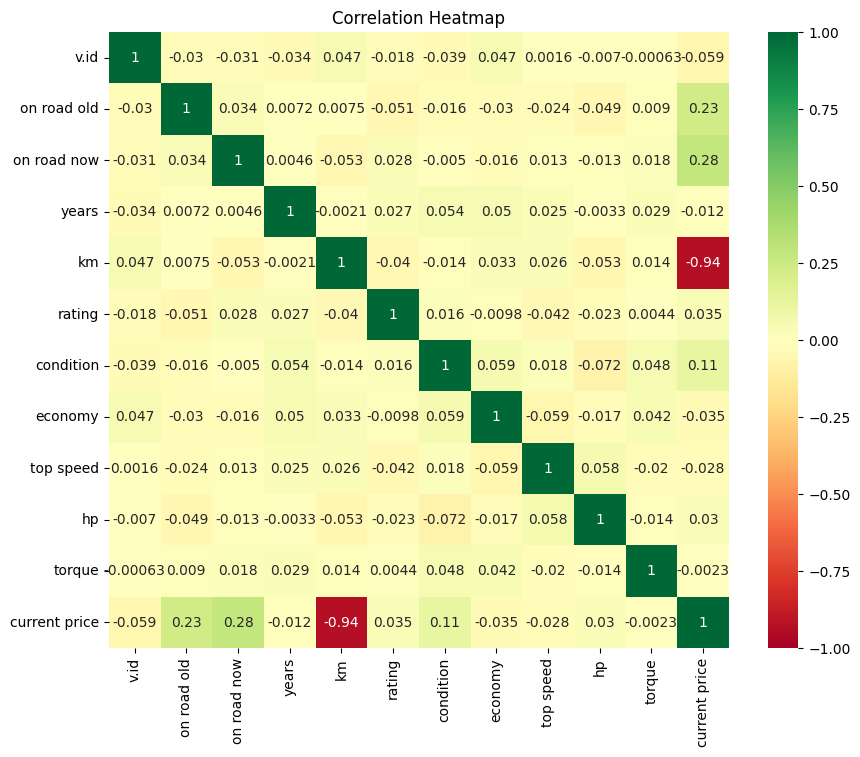

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 提取特徵和目標變數
X = df.drop(["current price"], axis=1)
y = df["current price"]

# 計算特徵與目標變數的相關係數
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["current price"].abs().sort_values(ascending=False)

# 選擇相關係數大於閾值的特徵
threshold = 0.5
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# 保留選擇的特徵及目標變數
selected_df = df[selected_features + ["current price"]]

# 顯示選擇的特徵及目標變數
print('Selected Features and Target Variable:')
print(selected_df.head())

# 繪製特徵與目標變數的相關係數熱力圖
plt.figure(figsize=(10 ,8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

特徵-ML


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# 提取特徵和目標變數

X = df.drop('current price', axis=1)
y = df['current price']

# 創建梯度提升樹模型
model = GradientBoostingRegressor()

# 訓練模型
model.fit(X, y)

# 獲取特徵重要性
feature_importance = model.feature_importances_

# 建立特徵重要性的DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# 根據特徵重要性降序排列
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 打印特徵重要性
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
        Feature  Importance
4            km    0.882046
2   on road now    0.053454
1   on road old    0.050762
6     condition    0.013246
3         years    0.000357
10       torque    0.000040
8     top speed    0.000027
5        rating    0.000024
7       economy    0.000024
0          v.id    0.000016
9            hp    0.000004


## 模型訓練

模型訓練-LinerRegression

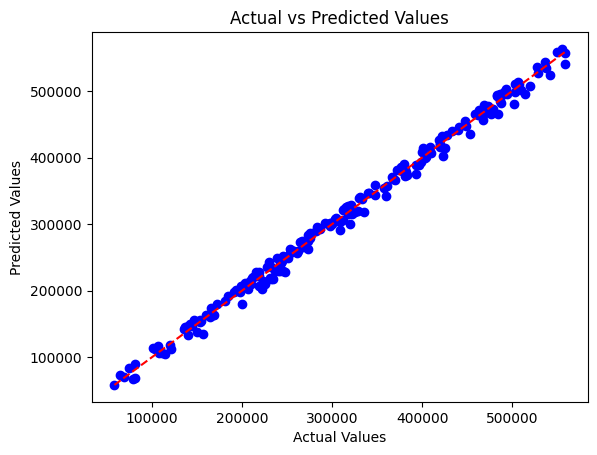


Mean Squared Error (MSE): 81030910.7044341
Root Mean Squared Error (RMSE): 9001.717097556115
Mean Absolute Error (MAE): 7569.793607126104
Mean Absolute Percentage Error (MAPE): 3.0270002559648583
R squared: 0.9951798797617534


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# 提取特徵和目標變數
# X = df[['on road now', "on road old", "km", "years"]] #標準差法、離群值法方
# X = df[["km", "years"]] #箱型法
# X = df[["km", "years"]] #ML
X = df.drop(['current price', 'v.id'], axis=1)
y = df['current price']



# 將數據集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 資料正規化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 創建線性回歸模型
model = LinearRegression()
# 使用訓練集訓練模型
model.fit(X_train, y_train)
# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)

模型訓練-PolynomialFeatures

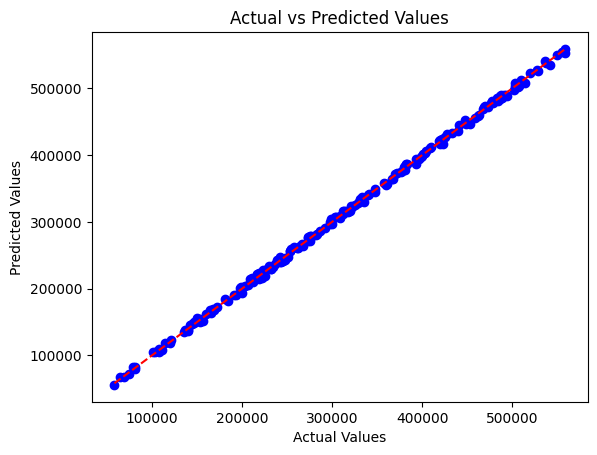


Mean Squared Error (MSE): 9868963.615816964
Root Mean Squared Error (RMSE): 3141.4906677908443
Mean Absolute Error (MAE): 2690.445790043457
Mean Absolute Percentage Error (MAPE): 1.0873897307148936
R squared: 0.9994129451237611


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# 提取特徵和目標變數
X = df.drop(['current price', 'v.id'], axis=1)
y = df['current price']



# 創建多項式特徵轉換器
poly = PolynomialFeatures()
# 將特徵資料轉換為多項式特徵
X_poly = poly.fit_transform(X)

# 將轉換後的特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 資料正規化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 創建多項式回歸模型
model = LinearRegression()

# 使用訓練及訓練模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


模型訓練-DecisionTreeRegressor

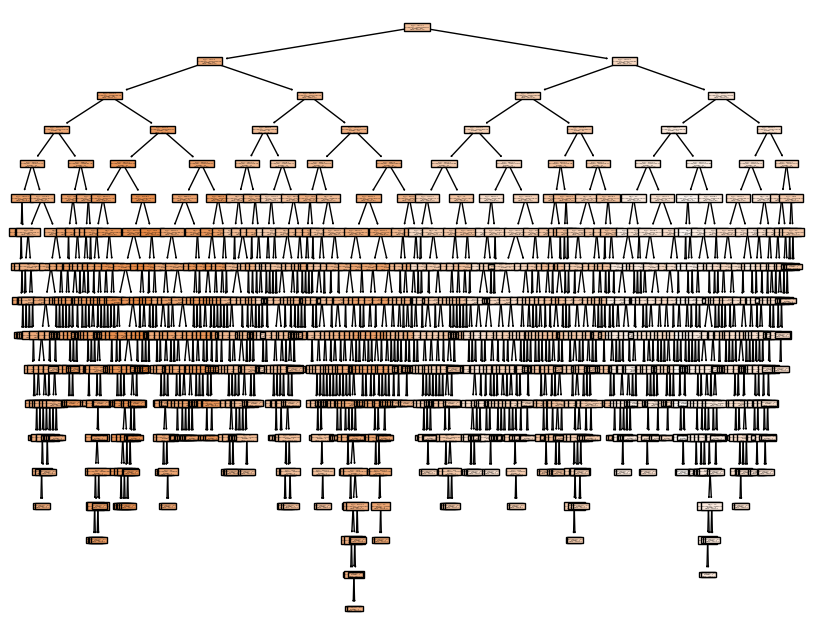

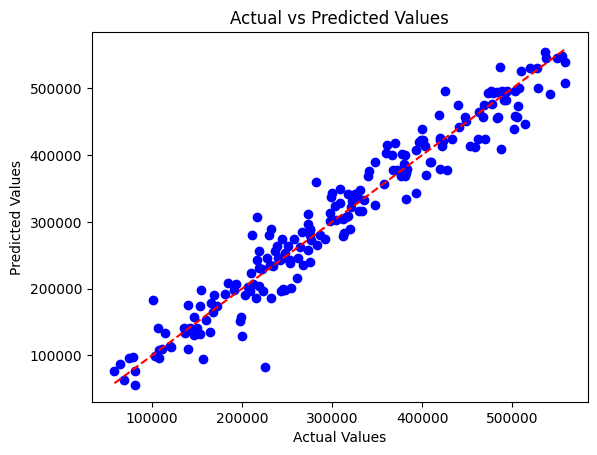


Mean Squared Error (MSE): 962338413.205
Root Mean Squared Error (RMSE): 31021.57979866596
Mean Absolute Error (MAE): 23045.365
Mean Absolute Percentage Error (MAPE): 9.122592621673036
R squared: 0.9427553408790977


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# 提取特徵和目標變數
X = df.drop(["current price", 'v.id'], axis=1)
y = df['current price']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建決策樹回歸模型
model = DecisionTreeRegressor()

# 使用訓練集訓練決策樹回歸模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)


# 繪製決策樹圖
plt.figure(figsize=(10, 8))
tree.plot_tree(model, filled=True)
plt.show()

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)

RandomForestRegressor

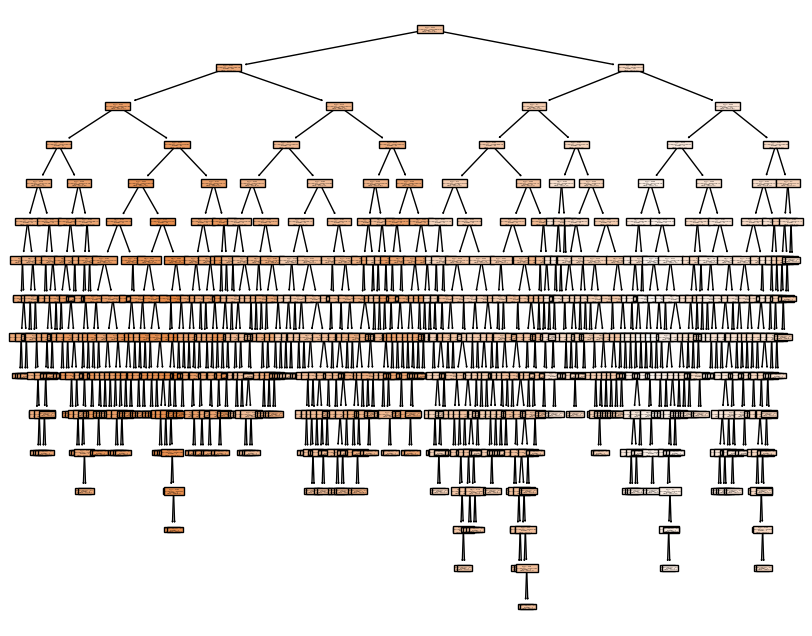

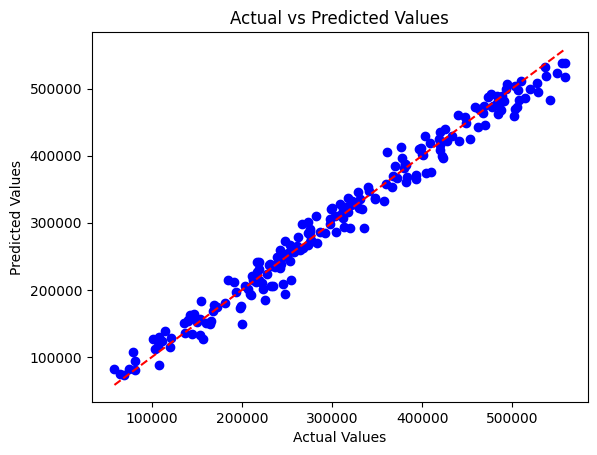


Mean Squared Error (MSE): 341226182.83834106
Root Mean Squared Error (RMSE): 18472.30854112017
Mean Absolute Error (MAE): 14450.370725
Mean Absolute Percentage Error (MAPE): 5.779521983466181
R squared: 0.9797021751894399


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 提取特徵和目標變數
X = df.drop(['current price', 'v.id'], axis=1)
y = df['current price']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 資料正規化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 創建隨機森林回歸模型
model = RandomForestRegressor()

# 使用訓練集訓練隨機森林回歸模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 繪製隨機森林中的一棵樹
plt.figure(figsize=(10, 8))
tree.plot_tree(model.estimators_[0], filled=True)
plt.show()

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)

梯度提升回歸


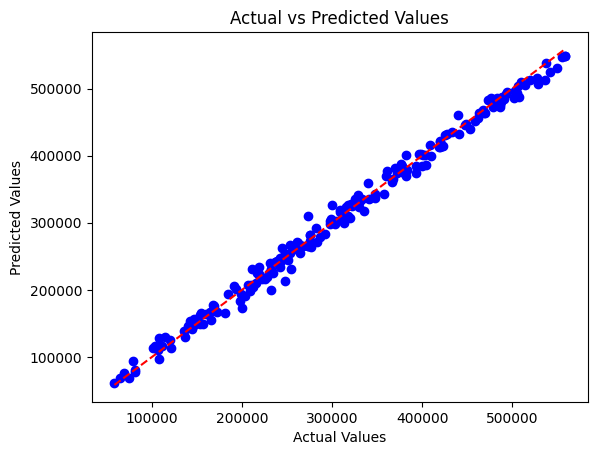


Mean Squared Error (MSE): 111161181.46102825
Root Mean Squared Error (RMSE): 10543.300311621037
Mean Absolute Error (MAE): 8362.944850414457
Mean Absolute Percentage Error (MAPE): 3.359625961795902
R squared: 0.9933875819016509


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 提取特徵和目標變數
X = df.drop(['current price', 'v.id'], axis=1)
y = df['current price']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 資料正規化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 創建梯度提升回歸模型
model = GradientBoostingRegressor()

# 使用訓練集訓練梯度提升回歸模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


10-fold

Cross Validation 1: MSE = 516294733.76808023, RMSE = 22722.119922403373
Cross Validation 2: MSE = 383758852.8724341, RMSE = 19589.76398205027
Cross Validation 3: MSE = 352709620.9453743, RMSE = 18780.564979397568
Cross Validation 4: MSE = 283192304.16856635, RMSE = 16828.318518751847
Cross Validation 5: MSE = 347877786.93634367, RMSE = 18651.482164598707
Cross Validation 6: MSE = 436915519.1805799, RMSE = 20902.52422987664
Cross Validation 7: MSE = 319575374.8915482, RMSE = 17876.67124750993
Cross Validation 8: MSE = 343550453.54179007, RMSE = 18535.114068755825
Cross Validation 9: MSE = 502785894.6688965, RMSE = 22422.887741521976
Cross Validation 10: MSE = 338595136.57607615, RMSE = 18400.954773491405


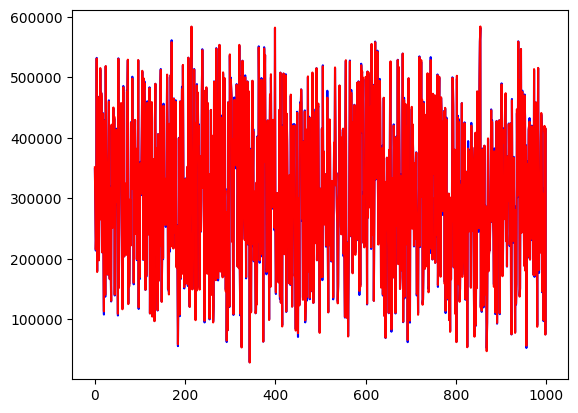

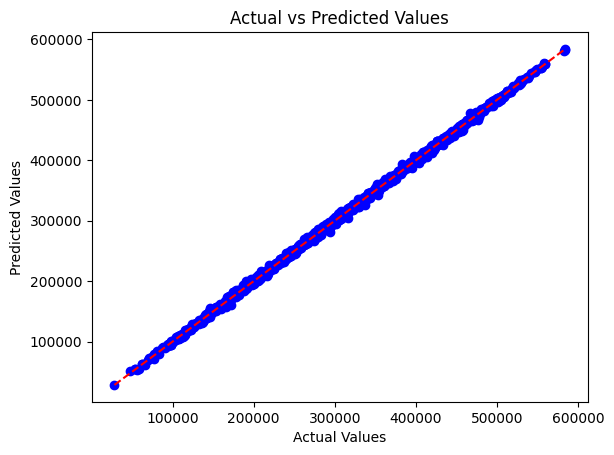


Mean Squared Error (MSE): 382525567.754969
Root Mean Squared Error (RMSE): 19471.040162835758
Mean Absolute Error (MAE): 2264.684486726319
Mean Absolute Percentage Error (MAPE): 0.9178254699799979
R squared: 0.9994227672406037


In [ ]:
from sklearn.model_selection import cross_val_score

# 提取特徵和目標變數
X = df.drop(['current price', 'v.id'], axis=1)
y = df['current price']
# 創建梯度提升回歸模型
model = GradientBoostingRegressor(alpha=0.9, learning_rate=1, min_samples_split=2)
# 使用10次交叉驗證評估模型性能
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
mse = -  scores

# 計算均方根誤差（RMSE）
rmse = np.sqrt(mse)

# 使用訓練集訓練梯度提升回歸模型
model.fit(X, y)

# 使用訓練好的模型進行預測
y_pred = model.predict(X)

# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y - y_pred) / y)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y) ** 2)
sst = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ssr / sst)

# 顯示每次交叉驗證的結果
for i, score in enumerate(scores):
    print(f"Cross Validation {i+1}: MSE = {-score}, RMSE = {np.sqrt(-score)}")

# 可視化預測值和實際值
plt.figure()
plt.plot(range(len(y_pred)), y_pred, color='blue')
plt.plot(range(len(y_pred)), y, color='red')
plt.show()
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", np.mean(mse))
print("Root Mean Squared Error (RMSE):", np.mean(rmse))
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


K最近鄰回歸


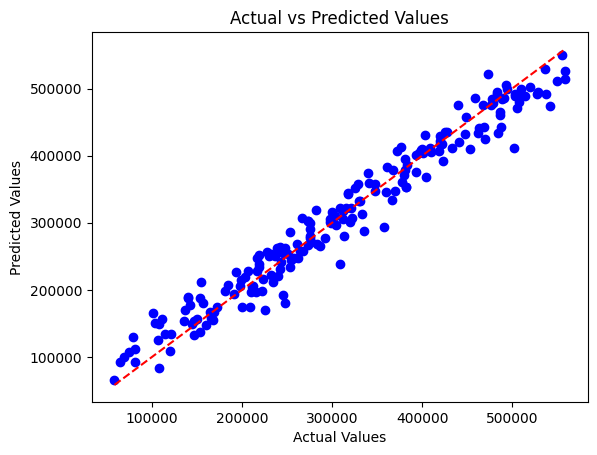


Mean Squared Error (MSE): 689801609.4175501
Root Mean Squared Error (RMSE): 26264.07450144684
Mean Absolute Error (MAE): 20745.625500000002
Mean Absolute Percentage Error (MAPE): 8.985344107118975
R squared: 0.9589671809310332


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 提取特徵和目標變數
X = df.drop(['current price', 'v.id'], axis=1)
y = df['current price']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 資料歸一化 (使用後效果比不使用差)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# 創建K最近鄰回歸模型
model = KNeighborsRegressor()

# 使用訓練集訓練K最近鄰回歸模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


NN 類神經網路

Best Parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}


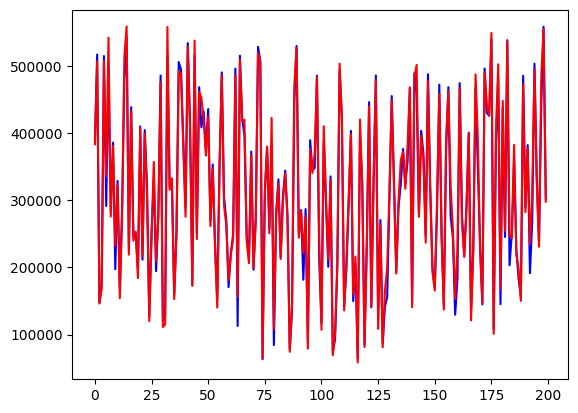

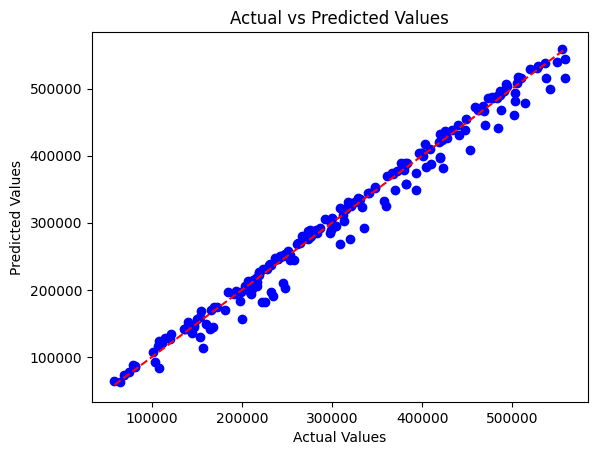


Mean Squared Error (MSE): 268931773.2753312
Root Mean Squared Error (RMSE): 16399.13940654604
Mean Absolute Error (MAE): 11807.863624602267
Mean Absolute Percentage Error (MAPE): 4.473080678497876
R squared: 0.9840026050330315


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# 提取特徵和目標變數
X = df.drop(['current price', 'v.id'], axis=1)
y = df['current price']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定義要調整的參數範圍
param_grid = {
    'hidden_layer_sizes': [(50,50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# 創建類神經網絡回歸模型
model = MLPRegressor()

# 使用 GridSearchCV 尋找最佳參數組合
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 獲取最佳參數組合
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 使用最佳參數組合的模型進行預測
model = MLPRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.figure()
plt.plot(range(len(y_pred)), y_pred, color='blue')
plt.plot(range(len(y_pred)), y_test, color='red')
plt.show()

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


GRU(Gated Recurrent Unit)

Epoch 1/100
25/25 [==============================] - 4s 35ms/step - loss: 56294248448.0000
Epoch 2/100
25/25 [==============================] - 1s 26ms/step - loss: 14521367552.0000
Epoch 3/100
25/25 [==============================] - 1s 38ms/step - loss: 14623470592.0000
Epoch 4/100
25/25 [==============================] - 1s 36ms/step - loss: 13769829376.0000
Epoch 5/100
25/25 [==============================] - 1s 35ms/step - loss: 14655056896.0000
Epoch 6/100
25/25 [==============================] - 1s 37ms/step - loss: 15069768704.0000
Epoch 7/100
25/25 [==============================] - 1s 32ms/step - loss: 13947772928.0000
Epoch 8/100
25/25 [==============================] - 1s 23ms/step - loss: 14794948608.0000
Epoch 9/100
25/25 [==============================] - 1s 22ms/step - loss: 14996429824.0000
Epoch 10/100
25/25 [==============================] - 1s 24ms/step - loss: 15087254528.0000
Epoch 11/100
25/25 [==============================] - 1s 22ms/step - loss: 15376698368.00

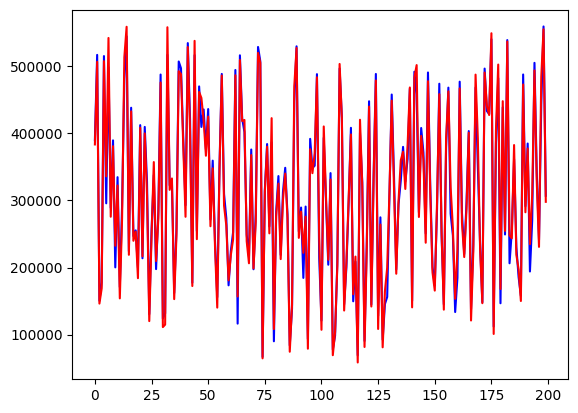

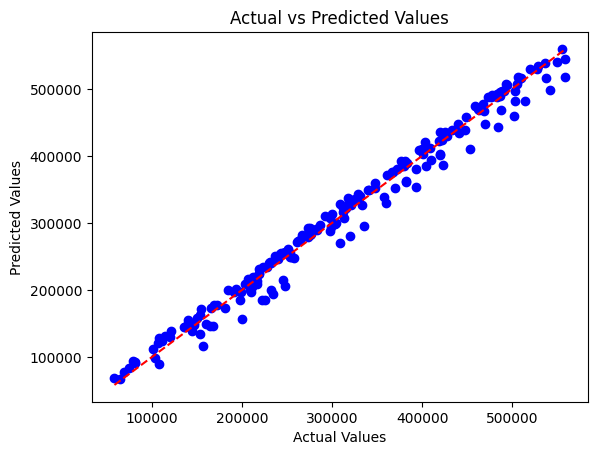


Mean Squared Error (MSE): 264941474.529617
Root Mean Squared Error (RMSE): 16277.022901305294
Mean Absolute Error (MAE): 12872.7498828125
Mean Absolute Percentage Error (MAPE): 5.085759020784213
R squared: 0.9842399677823042


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import Dropout

# 提取特徵和目標變數
X = df.drop(['current price', 'v.id'], axis=1)
y = df['current price']

# 將數據集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建GRU模型
model = Sequential()
model.add(GRU(256, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5, input_shape=(60,)))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5, input_shape=(60,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# 編譯模型
model.compile(loss='mean_squared_error', optimizer='adam')

# 將特徵資料轉換為三維形式
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# 使用訓練集訓練模型
model.fit(X_train, y_train, epochs=100, batch_size=32)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
# 將預測值和實際值轉換為一維數組
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.figure()
plt.plot(range(len(y_pred)), y_pred, color='blue')
plt.plot(range(len(y_pred)), y_test, color='red')
plt.show()

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)
